In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Exploratory Data Analysis:

## Viewing the Dataset:
First lets view the basic properties of our dataset by loading it and viewing it in the DataFrame format

In [2]:
#Loading the dataset
data_df = pd.read_csv("../Datasets/SampleSuperstore.csv")

In [3]:
#Viewing the first 5 rows of the dataset
data_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Viewing the information for the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The above information indicates that there are 9994 entries out of which none of the attributes carries missing values, thus, we do not have to perform operations on missing values. Although we have alot of object datatypes indicating that there are a mixed type of values in that attribute, but all such columns refer to String based attributes, so they won't cause a problem.

## Seperating Numerical and Categorical Attributes:
Before we begin with the dependencies of attributes on each other or the relation between them, its better to seperate numerical and categorical attributes so that it is easy to perform relation analysis on them. 

In [5]:
#Creating list of numerical and categorical columns from the dataframe
num_cols = list(data_df.select_dtypes([np.number]).columns)
cat_cols = list(set(data_df.columns) - set(num_cols))

In [6]:
#Viewing the numerical columns
num_cols

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [7]:
#Viewing the categorical columns
cat_cols

['Sub-Category',
 'Country',
 'State',
 'Segment',
 'Ship Mode',
 'Region',
 'City',
 'Category']

## Exploring the Attribute Values
Now before we head on, one last thing would be to check the properties of the values in a particular attribute. These include the occurence of a particular value in the attribute, etc. This would give us a rought idea of how much the values of the attribute scale and the effective way to plot them.

In [8]:
#Viewing the unique values in each of the columns
def get_unique_vals(attr):
    return len(list(attr.unique()))

In [9]:
#View unqiue values for all the columns of the dataframe
for col in data_df.columns:
    print("{} has {} unique values.".format(col, get_unique_vals(data_df[col])))

Ship Mode has 4 unique values.
Segment has 3 unique values.
Country has 1 unique values.
City has 531 unique values.
State has 49 unique values.
Postal Code has 631 unique values.
Region has 4 unique values.
Category has 3 unique values.
Sub-Category has 17 unique values.
Sales has 5825 unique values.
Quantity has 14 unique values.
Discount has 12 unique values.
Profit has 7287 unique values.


From the above information, we conclude that the *Country* attribute is not useful to us as it has only 1 unqiue value. Other attriutes might come in handy.

In [10]:
#Viewing the different metrics for the numerical attributes
data_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


It is clear that the Postal Code column doesn't point out to any information in this regard. Thus, it is better to convert it into string format (dtype = object)

In [11]:
#Converting postal code attribute from numeric to categorical
data_df["Postal Code"] = data_df["Postal Code"].apply('str')

## Influence of Numerical Attributes on Each Other
Before we get started, it is good to know the influence of each of the numerical attributes on each other i.e. how profit, sales, discount and quantity affect each other.

In [12]:
#Computing the numerical attributes 
num_cols = list(data_df.select_dtypes([np.number]).columns)
num_cols

['Sales', 'Quantity', 'Discount', 'Profit']

In [13]:
#Viewing the numerical attributes against each other via a correlation matrix
corr = data_df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


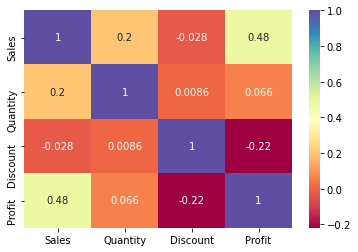

In [14]:
#Visualizing the correlation matrix via a heatmap
sns.heatmap(corr, annot=True, cmap='Spectral')

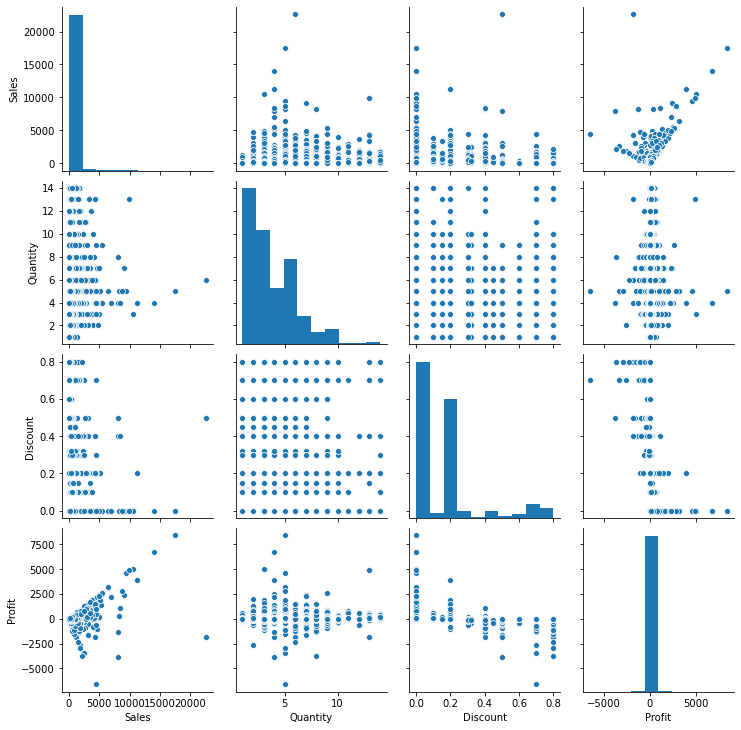

In [15]:
#Visualizing the relations between numerical attributes using pairplot
sns.pairplot(data_df)

## Influence of Ship Mode on Attributes:
Now lets analyze the influence of different ship modes on the numerical attributes

In [16]:
#Viewing the unique values of the Ship Mode column
data_df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [56]:
#Creating a method to visualize a particular attribute with numerical attributes
def plot_relations(x, rot=0):
    fig, axs = plt.subplots(2,2, figsize=(20,18))
    for i in range(len(num_cols)):
        q, m = divmod(i, 2)
        data_df.plot(kind="scatter", x=x, y=num_cols[i], ax=axs[q-1][m], rot=rot)
    plt.show()

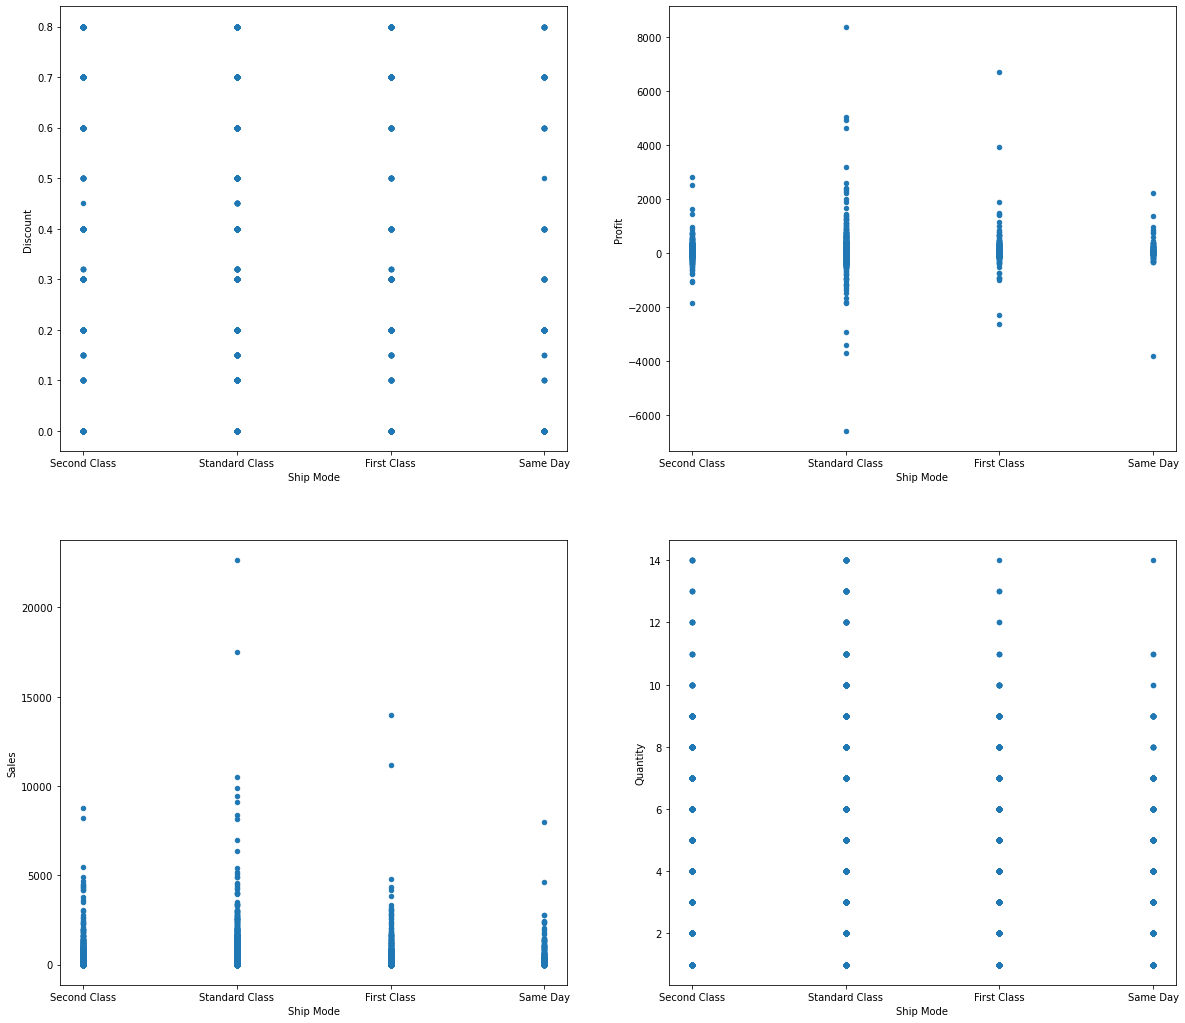

In [57]:
#Viewing relation of Ship Mode with the different numerical attributes
plot_relations("Ship Mode")

In [58]:
#Viewing the overall profit and loss for the different Shipping Modes
data_df.groupby(['Ship Mode'])['Profit'].sum()

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

#### Observations:
From the subplots, we can conclude the following observations:

* Ship Mode doesn't influence the Discount or the Quantity of the products (Average Discount / Quantity) for differnt ship modes is almost same.
* The most sales are carried out by Standard Class among the different Ship Modes.
* Although there are not many deliveries via Same Day Shipping Mode, but it provides the least amount of loss.
* In terms of overall profit, the Standard Class is the highest provider.

## Influence of Segements on other Attributes:
Now lets view the influence of different segments on the other attributes:

In [59]:
#Viewing the unqiue value counts of the Segment column
data_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

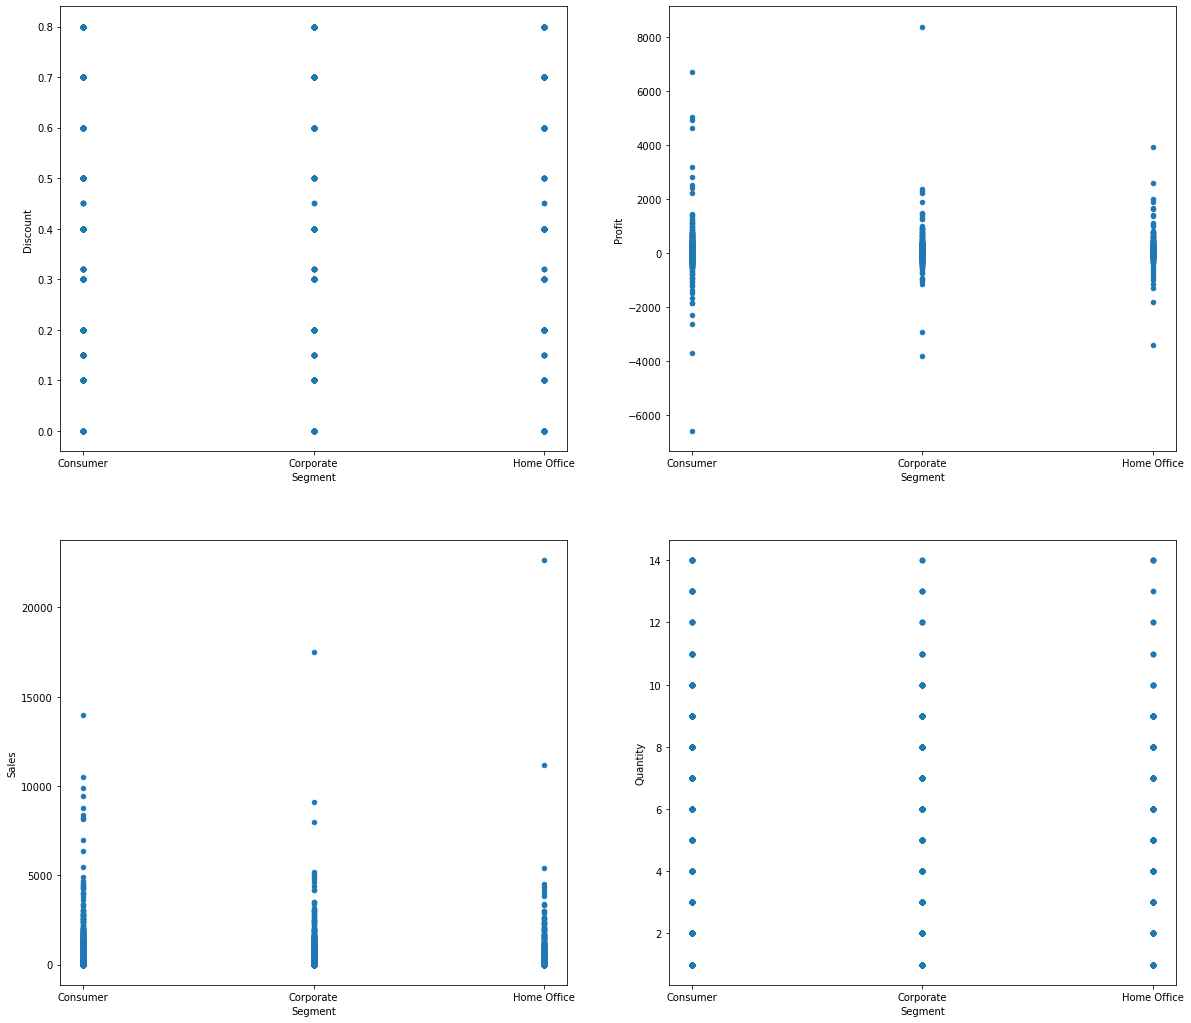

In [60]:
#Viewing the relation between Segment type and numerical attributes
plot_relations("Segment")

In [61]:
#Viewing the overall profit for the Segments
data_df.groupby(['Segment'])['Profit'].sum()

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

#### Observations:
From the subplots, we can conclude the following observations:

* Segment doesn't influence the Discount or the Quantity of the products (Average Discount / Quantity) for differnt segments is almost same.
* The most sales are carried out by Consumer Segment among the different Segments.
* The Corporate Segment provides the least amount of loss.
* In terms of overall profit, the Consumer Segment is the highest provider.

## Influence of State on other Attributes:
Lets view the influence of state attribute on the other attributes

In [62]:
#Viewing the unique values in States
data_df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

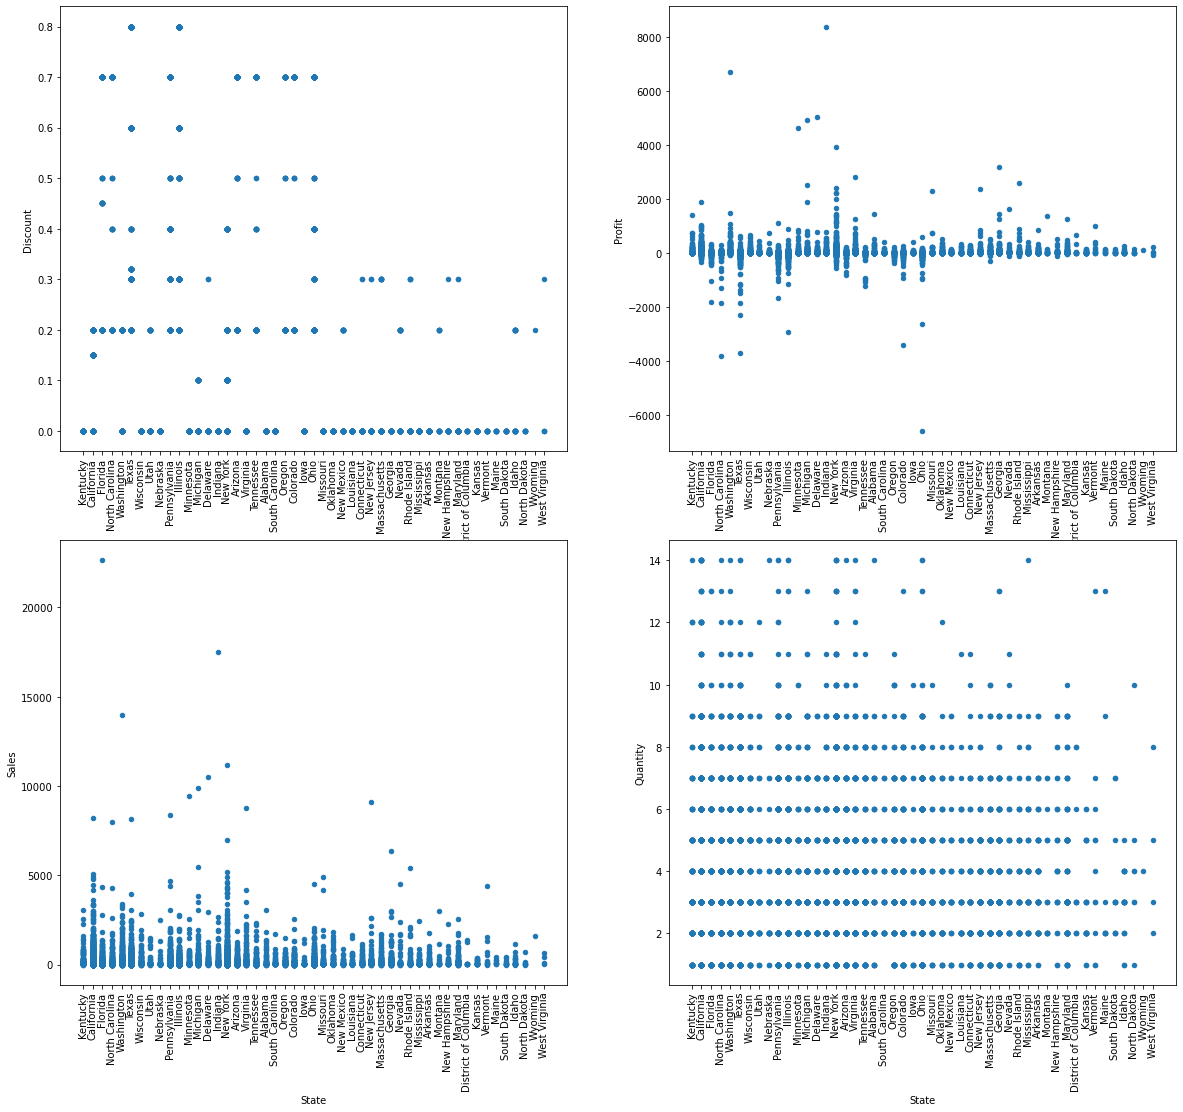

In [63]:
#Viewing relation of states with numerical attributes
plot_relations("State", 90)

In [65]:
#Viewing the overall profit for different states
state_profits = data_df.groupby(['State'])['Profit'].sum()